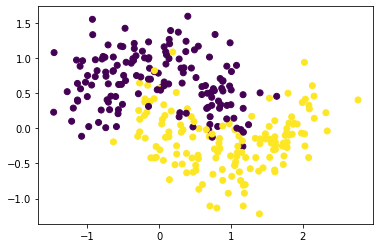

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

N = 300
x, t = datasets.make_moons(N, noise=0.3)

plt.scatter(x[:,0],x[:,1],c=t)
plt.show()

In [38]:
#ipnbファイルはモジュールとして読み込まない
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

class MLP(object):
  '''
  多層パーセプトロン
  '''
  def __init__(self, input_dim, hidden_dim, output_dim):
    '''
    引数:
          input_dim: 入力層の次元
          hidden_dim: 隠れ層の次元
          output_dim: 出力層の次元
    '''
    self.l1 = Layer(input_dim=input_dim,
                    output_dim=hidden_dim,
                    activation=sigmoid,
                    dactivation=dsigmoid)
    
    self.l２ = Layer(input_dim=hidden_dim,
                    output_dim=output_dim,
                    activation=sigmoid,
                    dactivation=dsigmoid)
    
    self.layers = [self.l1, self.l2]

  def __call__(self, x):
    return self.forward(x)

  def forward(self, x):
    h = self.l1(x)
    y = self.l2(h)
    return y

class Layer(object):
  def __init__(self, input_dim, output_dim, activation, dactivation):
    '''
    インスタンス変数:
      W: 重み
      b: バイアス
      activation: 活性化関数
      dactivation: 活性化関数の微分
    '''
    self.W = np.random.normal(size=(input_dim, output_dim))
    self.b = np.zeros(output_dim)

    self.activation = activation
    self.dactivation = dactivation
  
  def __call__(self, x):
    return self.forward(x)
  
  def forward(self, x):
    self._input = x
    self._pre_activation = np.matmul(x, self.W) + self.b
    return self.activation(self._pre_activation)

  def backward(self, delta, W):
    delta = self.dactivation(self._pre_activation) * np.matmul(delta, W.T)
    return delta

  def compute_gradients(self, delta):
    dW = np.matmul(self._input.T, delta)
    db = np.matmul(np.ones(self._input.shape[0]), delta)
    return dW, db

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def dsigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

if __name__ == '__main__':
  np.random.seed(123)

  '''
  1. データの準備
  '''
  N = 300
  x, t = datasets.make_moons(N, noise=0.3)
  t = t.reshape(N, 1)

  x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2)
  '''
  2. モデルの構築
  '''
  #model = MLP(2, 2, 1)
  model = MLP(2, 3, 1)
  '''
  3. モデルの学習
  '''
  def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()
  
  def train_step(x, t):
    y = model(x)
    for i, layer in enumerate(model.layers[: :- 1]):
      if i == 0:
        delta = y - t
      else:
        delta = layer.backward(delta, W)

      dW, db = layer.compute_gradients(delta)
      layer.W = layer.W - 0.1 * dW
      layer.b = layer.b - 0.1 * db

      W = layer.W

    loss = compute_loss(t, y)
    return loss

  epochs = 100
  batch_size = 30
  n_batches = x_train.shape[0] // batch_size

  for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x_train, t_train)
    
    for n_batch in range(n_batches):
      start = n_batch * batch_size
      end = start + batch_size

      train_loss += train_step(x_[start:end],
                               t_[start:end])
      
      if epoch % 10 == 0 or epoch == epochs - 1:
        print('epoch: {}, loss: {: .3f}'.format(epoch+1, train_loss))

  '''
  4. モデルの評価
  '''
  preds = model(x_test) > 0.5
  acc = accuracy_score(t_test, preds)
  print('acc.: {: .3f}'.format(acc))

epoch: 1, loss:  38.888
epoch: 1, loss:  56.991
epoch: 1, loss:  72.381
epoch: 1, loss:  87.346
epoch: 1, loss:  100.470
epoch: 1, loss:  116.891
epoch: 1, loss:  129.912
epoch: 1, loss:  143.587
epoch: 11, loss:  12.102
epoch: 11, loss:  28.375
epoch: 11, loss:  42.789
epoch: 11, loss:  56.903
epoch: 11, loss:  65.910
epoch: 11, loss:  78.339
epoch: 11, loss:  88.424
epoch: 11, loss:  100.656
epoch: 21, loss:  11.146
epoch: 21, loss:  20.585
epoch: 21, loss:  36.795
epoch: 21, loss:  50.265
epoch: 21, loss:  61.579
epoch: 21, loss:  80.498
epoch: 21, loss:  88.303
epoch: 21, loss:  97.881
epoch: 31, loss:  8.847
epoch: 31, loss:  22.631
epoch: 31, loss:  34.802
epoch: 31, loss:  41.132
epoch: 31, loss:  53.406
epoch: 31, loss:  65.671
epoch: 31, loss:  74.677
epoch: 31, loss:  93.624
epoch: 41, loss:  14.436
epoch: 41, loss:  25.493
epoch: 41, loss:  37.205
epoch: 41, loss:  48.453
epoch: 41, loss:  58.585
epoch: 41, loss:  71.280
epoch: 41, loss:  81.508
epoch: 41, loss:  90.038
epoc

In [27]:
from google.colab import files
uploaded = files.upload()

Saving __init__.ipynb to __init__.ipynb
Saving MLP.ipynb to MLP (1).ipynb
